<a href="https://colab.research.google.com/github/dariobublitz/DS/blob/main/Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción:
Se nos proporciona un conjunto de datos sobre la información bancaria de alrededor de 10.000 clientes y también se nos indica si se han retirado o no. Nuestra tarea es construir un modelo de ML de manera que podamos predecir si un cliente va a retirarse o no. También realizaremos un EDA en este conjunto de datos para informar al banco sobre lo que podrían hacer para minimizar la retirada y construir un negocio sostenible.

# Las preguntas que queremos hacer son:
¿Cómo se relacionan diferentes variables con la posibilidad de que un cliente abandone el banco? ¿Cuál es la proporción entre clientes normales y clientes que se van? ¿La muestra está equilibrada? ¿O es una muestra desequilibrada? ¿Existe una relación entre el género y el hecho de que abandonen el banco? ¿Cómo influye el salario en que el cliente se quede o se vaya del banco? ¿Cómo influye la variable de puntuación crediticia? ¿Es una relación directa o inversa? ¿Cómo influye el número de productos que el cliente tiene dentro del banco? ¿Hay alguna relación con el país de origen? Los datos parecen ser una instantánea en algún momento en el tiempo, por ejemplo, el saldo es para una fecha determinada, lo que plantea muchas preguntas: ¿Qué fecha es y qué relevancia tiene esta fecha? ¿Sería posible obtener saldos durante un período de tiempo en lugar de una sola fecha? Si hay clientes que se han ido pero aún tienen dinero en su cuenta, ¿qué significa eso? ¿Podrían haber salido de un producto y no del banco? ¿Qué significa ser un miembro activo y hay diferentes grados de esto? ¿Podría ser mejor proporcionar el recuento de transacciones tanto en términos de créditos como de débitos en la cuenta en lugar de una simple cuenta de productos? Un desglose de los productos comprados por un cliente podría proporcionar más información sobre la lista de productos.

Tener contexto y una mejor comprensión del proceso de extracción de datos proporcionaría una mejor perspectiva y posiblemente conduciría a resultados contextuales mejores del proceso de modelado.



# Exploración de datos

In [ ]:
#@title <font color='#6DC36D'>#Importando todas las bibliotecas esenciales.</font>
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier

import warnings
warnings.filterwarnings('ignore')

# Importa la función clear_output
from IPython.display import clear_output
clear_output()

# Sobre el conjunto de datos
Este conjunto de datos es para el banco ABC Multistate con las siguientes columnas:

1. **customer_id**, variable no utilizada..
2. **credit_score**, used as input.
3. **country,** utilizada como entrada.
4. **gender**, utilizada como entrada.
5. **age**, utilizada como entrada.
6. **tenure**, utilizada como entrada.
7. **balance**, utilizada como entrada.
8. **products_number**, utilizada como entrada.
9. **credit_card**, utilizada como entrada.
10. **active_member**, utilizada como entrada.
11. **estimated_salary**, utilizada como entrada.
12. <font color="yellow">**churn**</font>, utilizada como <font color="yellow">objetivo.

1 si el cliente ha abandonado el banco durante algún período o 0 si no lo ha hecho. El objetivo es predecir la Retirada de Clientes para el Banco ABC.







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title #import dataset <a href="https://drive.google.com/file/d/18vd-t66wh9VeuZBLSgPJomIiyD0ePt0y/view?usp=share_link">link</a> 
import os
import pandas as pd
import gdown
file_path = '/content/drive/MyDrive/colab/Bank_Customer_Churn_Prediction.csv'
file_id = '18vd-t66wh9VeuZBLSgPJomIiyD0ePt0y'
# en Google, la URL será similar a esta:https://docs.google.com/document/d/FILE_ID/edit
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    gdown.download(f'https://drive.google.com/uc?id={file_id}', 'Bank_Customer_Churn_Prediction.csv', quiet=False)
    df = pd.read_csv('Bank_Customer_Churn_Prediction.csv')
#La función gdown.download se utiliza para descargar archivos desde Google Drive. La función toma tres argumentos en este caso:
#La URL de descarga directa del archivo, que se construye utilizando la variable file_id en el formato https://drive.google.com/uc?id={file_id}.
#El nombre del archivo de destino en el sistema de archivos local. En este caso, es 'Bank_Customer_Churn_Prediction.csv'.
#quiet=False: Este argumento controla si la función muestra una barra de progreso 
df.head()

customer_id  credit_score country  gender  age  tenure   balance  \
0     15634602           619  France  Female   42       2      0.00   
1     15647311           608   Spain  Female   41       1  83807.86   
2     15619304           502  France  Female   42       8 159660.80   
3     15701354           699  France  Female   39       1      0.00   
4     15737888           850   Spain  Female   43       2 125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.shape

(10000, 12)

In [ ]:
#@title .describe( ).T
df.drop(columns=['customer_id']).describe().T.sort_values(ascending=0, by="mean").style.background_gradient(cmap="BuGn") \
.bar(subset=["std"], color="red").bar(subset=["mean"], color="blue")


In [ ]:
df.drop(columns=['customer_id']).nunique()

credit_score         460
country                3
gender                 2
age                   70
tenure                11
balance             6382
products_number        4
credit_card            2
active_member          2
estimated_salary    9999
churn                  2
dtype: int64

In [ ]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

No tenemos nulos

<Axes: >

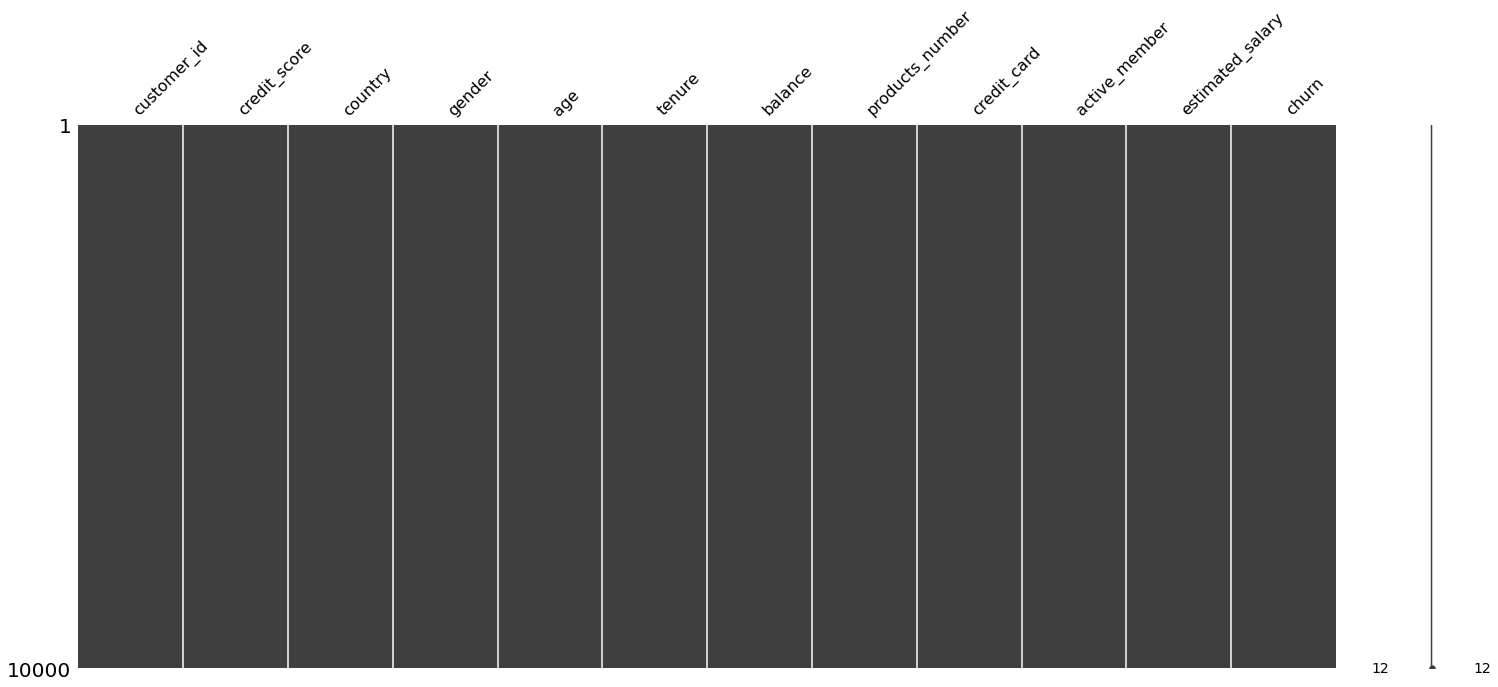

In [ ]:
msno.matrix(df)

 DISCRETA o CATEGÓRICA

In [ ]:
# Devuelve el recuento de valores únicos en la columna 'churn' del dataframe
# df, ordenado en orden descendente por cantidad de veces que aparece cada valor.
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [ ]:
#Rate_churn=20.37% 

Uno de cada 5 clientes decide dejar el banco o el producto (claramente es un problema desequilibrado).

In [ ]:
# Devuelve el recuento de valores únicos en la columna 'active_member' del dataframe
# df, ordenado en orden descendente por cantidad de veces que aparece cada valor.
df['active_member'].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

Aunque no sabemos exactamente qué significa miembro_activo, podemos decir que la mitad de los clientes está en esta categoría y la otra mitad no lo está.

In [ ]:
# Devuelve el recuento de valores únicos en la columna 'credit_card' del dataframe
# df, ordenado en orden descendente por cantidad de veces que aparece cada valor.
df['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

El 70.55% de los clientes tiene una tarjeta de crédito.

In [ ]:
# Devuelve el recuento de valores únicos en la columna 'products_number' del dataframe
# df, ordenado en orden descendente por cantidad de veces que aparece cada valor.
df['products_number'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

El 50.48% tiene un producto, el 45.90% tiene dos, solo el 2.66% tiene tres productos y el 0.60% tiene cuatro productos del banco.

In [ ]:
# Devuelve el recuento de valores únicos en la columna 'tenure' del dataframe
# df, ordenado en orden descendente por cantidad de veces que aparece cada valor.
df['tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

In [ ]:
# Devuelve el recuento de valores únicos en la columna 'age' del dataframe
# df, ordenado en orden descendente por cantidad de veces que aparece cada valor.
df['age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: age, Length: 70, dtype: int64

In [ ]:
# Crea una nueva columna 'decada' en el DataFrame asociada a la edad del cliente
df['decada'] = (df['age'] // 10) * 10

# Muestra el recuento de valores únicos en la columna 'decada'
decada_counts = df['decada'].value_counts()
print(decada_counts)


30    4346
40    2618
20    1592
50     869
60     375
70     136
10      49
80      13
90       2
Name: decada, dtype: int64


In [ ]:
# Devuelve el recuento de valores únicos en la columna 'gender' del dataframe
# df, ordenado en orden descendente por cantidad de veces que aparece cada valor.
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

El 54,57% son de género masculino.

In [ ]:
# Devuelve el recuento de valores únicos en la columna 'countryr' del dataframe
# df, ordenado en orden descendente por cantidad de veces que aparece cada valor.
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

El 50,14% son franceses, el 25,09% son alemanes y el 24,77% son españoles.

Varibles continuas 👉  describe().T

In [ ]:
df[['credit_score', 'age', 'balance', 'estimated_salary']].describe().T

count      mean      std    min      25%       50%  \
credit_score     10000.00    650.53    96.65 350.00   584.00    652.00   
age              10000.00     38.92    10.49  18.00    32.00     37.00   
balance          10000.00  76485.89 62397.41   0.00     0.00  97198.54   
estimated_salary 10000.00 100090.24 57510.49  11.58 51002.11 100193.91   

                       75%       max  
credit_score        718.00    850.00  
age                  44.00     92.00  
balance          127644.24 250898.09  
estimated_salary 149388.25 199992.48

Credit_score oscila entre 350 y 850 con una distribución simétrica de los datos. La edad oscila entre 18 y 92 años con asimetría positiva. El saldo sube a 250.000 y el sueldo estimado llega casi a los 200.000.

Varibles continuas 👉 describe( ). BOXPLOT

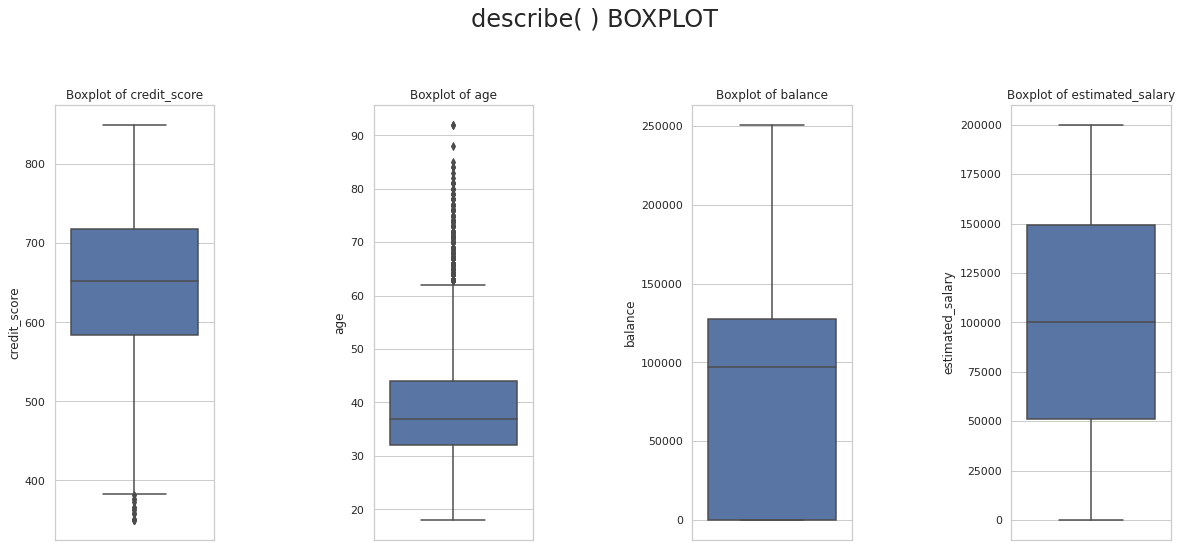

In [ ]:
#@title describe( ) BOXPLOT 
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas que deseas graficar
selected_columns = df[['credit_score', 'age', 'balance', 'estimated_salary']]

# Crea una figura y un conjunto de ejes de subtramas
fig, axes = plt.subplots(1, 4, figsize=(20, 8))

# Ajusta el espacio entre los gráficos
fig.subplots_adjust(wspace=1)

# Itera sobre las columnas y crea un boxplot para cada una
for idx, column in enumerate(selected_columns):
    sns.boxplot(data=df, y=column, ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {column}')

# Añadir título general
fig.suptitle('describe( ) BOXPLOT', fontsize=24, y=1.05)

# Muestra el gráfico
plt.show()

Varibles discretas 👉 Gráficos de barras

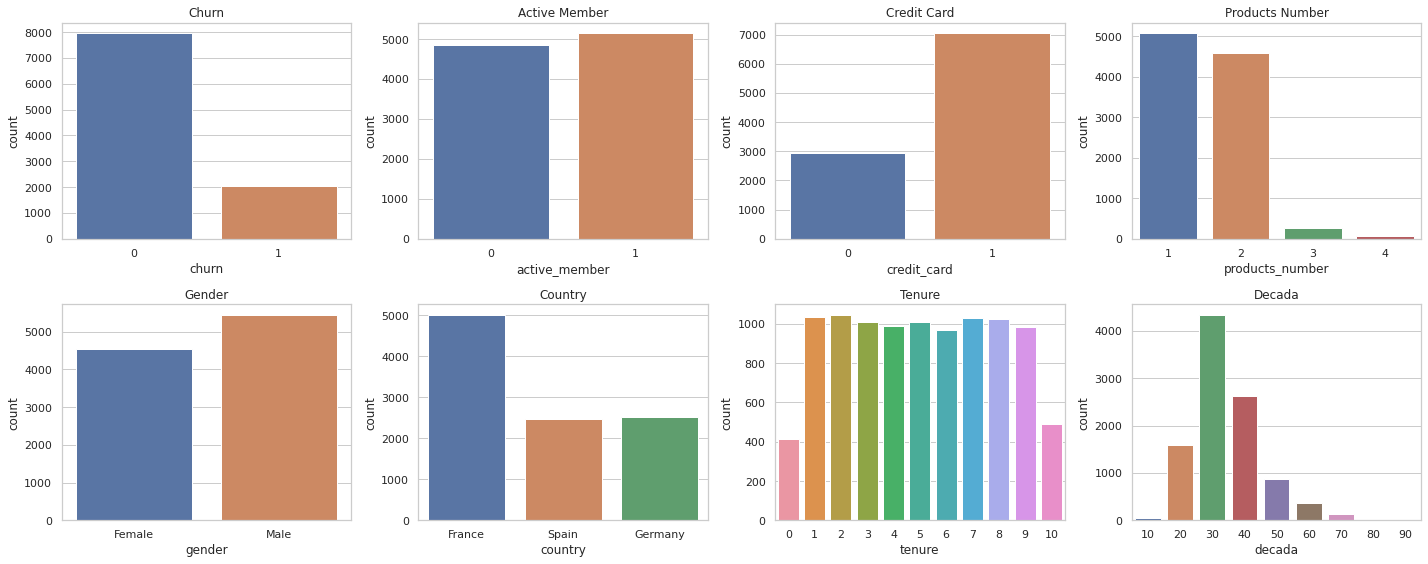

In [ ]:
#@title #EDA<br>una variable
import matplotlib.pyplot as plt
import seaborn as sns

# Crea una figura con varias subtramas (2 filas y 4 columnas)
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Gráfico de barras para 'churn'
sns.countplot(data=df, x="churn", ax=axes[0, 0])
axes[0, 0].set_title('Churn')

# Gráfico de barras para 'active_member'
sns.countplot(data=df, x="active_member", ax=axes[0, 1])
axes[0, 1].set_title('Active Member')

# Gráfico de barras para 'credit_card'
sns.countplot(data=df, x="credit_card", ax=axes[0, 2])
axes[0, 2].set_title('Credit Card')

# Gráfico de barras para 'products_number'
sns.countplot(data=df, x="products_number", ax=axes[0, 3])
axes[0, 3].set_title('Products Number')

# Gráfico de barras para 'gender'
sns.countplot(data=df, x="gender", ax=axes[1, 0])
axes[1, 0].set_title('Gender')

# Gráfico de barras para 'country'
sns.countplot(data=df, x="country", ax=axes[1, 1])
axes[1, 1].set_title('Country')

# Gráfico de barras para 'tenure'
sns.countplot(data=df, x="tenure", ax=axes[1, 2])
axes[1, 2].set_title('Tenure')

# Gráfico de barras para 'decada'
sns.countplot(data=df, x="decada", ax=axes[1, 3])
axes[1, 3].set_title('Decada')

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


In [ ]:
#@title interactive
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as ipw
from ipywidgets import interact

def plot_bar(column, size):
    # Establece el tamaño de la figura
    plt.figure(figsize=(4 * size, 3 * size))
    
    # Crea el gráfico de barras para la columna seleccionada
    sns.countplot(data=df, x=column)
    
    # Establece el título del gráfico
    plt.title(column.capitalize())
    
    # Muestra el gráfico
    plt.show()

# Crea un menú desplegable para seleccionar la columna
column_dropdown = ipw.Dropdown(
    options=[
        ('Churn', 'churn'),
        ('Active Member', 'active_member'),
        ('Credit Card', 'credit_card'),
        ('Products Number', 'products_number'),
        ('Gender', 'gender'),
        ('Country', 'country'),
        ('Tenure', 'tenure'),
        ('Decada', 'decada')
    ],
    value='churn',
    description='Column:'
)

# Crea un control deslizante para ajustar el tamaño del gráfico
size_slider = ipw.IntSlider(min=1, max=4, value=1, description='Size')

# Utiliza la función interact para actualizar el gráfico según las selecciones del usuario
interact(plot_bar, column=column_dropdown, size=size_slider);


interactive(children=(Dropdown(description='Column:', options=(('Churn', 'churn'), ('Active Member', 'active_m…

Varibles continuas 👉 Histogramas

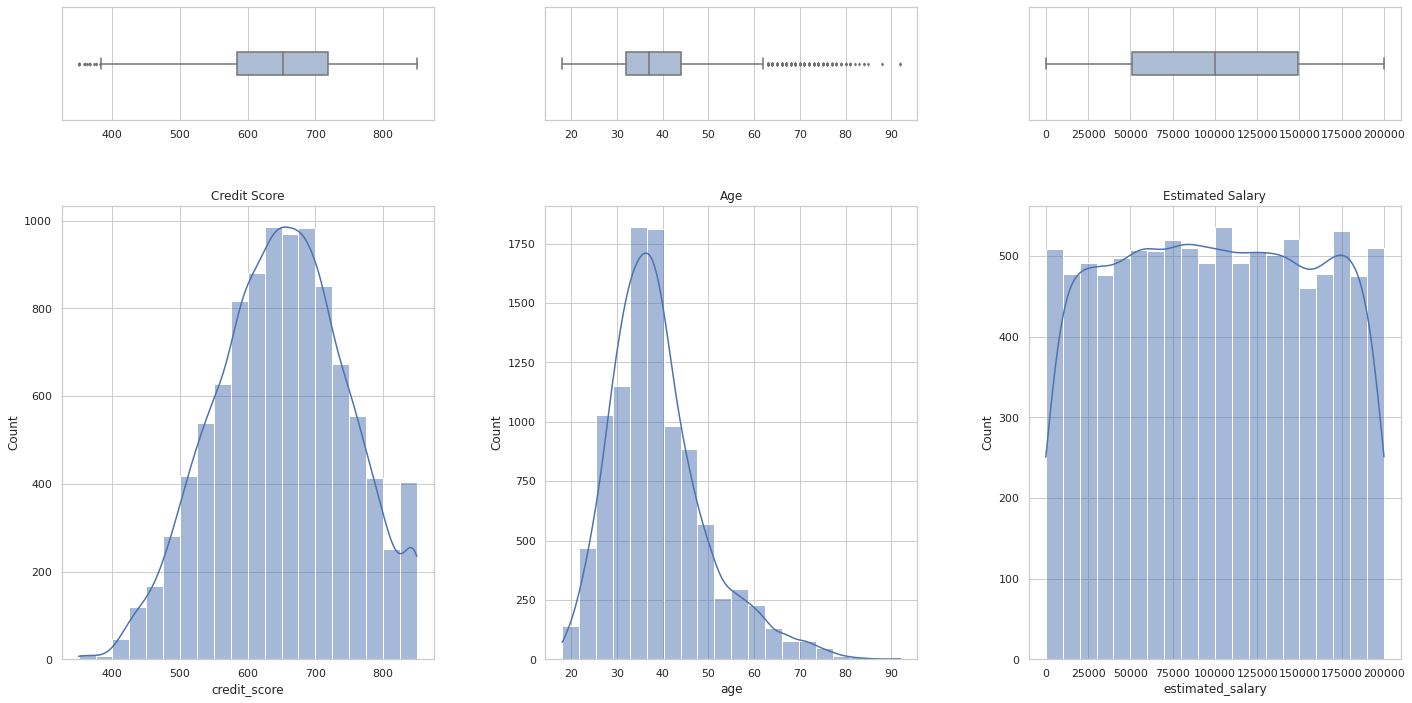

In [ ]:
#@title #Histogramas + boxplot
import matplotlib.pyplot as plt
import seaborn as sns

# Crea una figura y un conjunto de ejes de subtramas
fig, axes = plt.subplots(2, 3, figsize=(24, 12), gridspec_kw={'height_ratios': [1, 4]})

# Lista de columnas y títulos
columns = [('Credit Score', 'credit_score'), ('Age', 'age'), ('Estimated Salary', 'estimated_salary')]

# Función para trazar el histograma en un eje específico
def plot_histogram(ax, column, title, bins=20):
    sns.histplot(data=df, x=column, bins=bins, kde=True, ax=ax)
    ax.set_title(title)

# Función para trazar el boxplot en un eje específico
def plot_boxplot(ax, column):
    color = '#a6bddb'
    sns.boxplot(data=df, x=column, ax=ax, width=0.2, fliersize=2,palette=[color])
    ax.set_xlabel('')

# Ajusta el espacio entre los gráficos
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Itera sobre las columnas y crea un boxplot y un histograma para cada una
for idx, (title, column) in enumerate(columns):
    plot_boxplot(axes[0, idx], column)
    plot_histogram(axes[1, idx], column, title)

# Muestra el gráfico
plt.show()


In [ ]:
#@title EDA histogram interactive
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as ipw
from ipywidgets import interact

def plot_histogram(column, size, bins):
    # Establece el tamaño de la figura
    plt.figure(figsize=(4 * size, 3 * size))
    
    # Crea el histograma para la columna seleccionada
    sns.histplot(data=df, x=column, bins=bins, kde=False)
    
    # Establece el título del gráfico
    plt.title(column.capitalize())
    
    # Muestra el gráfico
    plt.show()

# Crea un menú desplegable para seleccionar la columna
column_dropdown = ipw.Dropdown(
    options=[
        ('Credit Score', 'credit_score'),
        ('Age', 'age'),
        ('Estimated Salary', 'estimated_salary')
    ],
    value='credit_score',
    description='Column:'
)

# Crea un control deslizante para ajustar el tamaño del gráfico
size_slider = ipw.IntSlider(min=1, max=4, value=1, description='Size')

# Crea un control deslizante para ajustar la cantidad de bins
bins_slider = ipw.IntSlider(min=5, max=75, step=1, value=20, description="Bins")

# Utiliza la función interact para actualizar el gráfico según las selecciones del usuario
interact(plot_histogram, column=column_dropdown, size=size_slider, bins=bins_slider);


interactive(children=(Dropdown(description='Column:', options=(('Credit Score', 'credit_score'), ('Age', 'age'…

# Vamos a separar churn=0 Vs churn=1

# EDA 2 variables

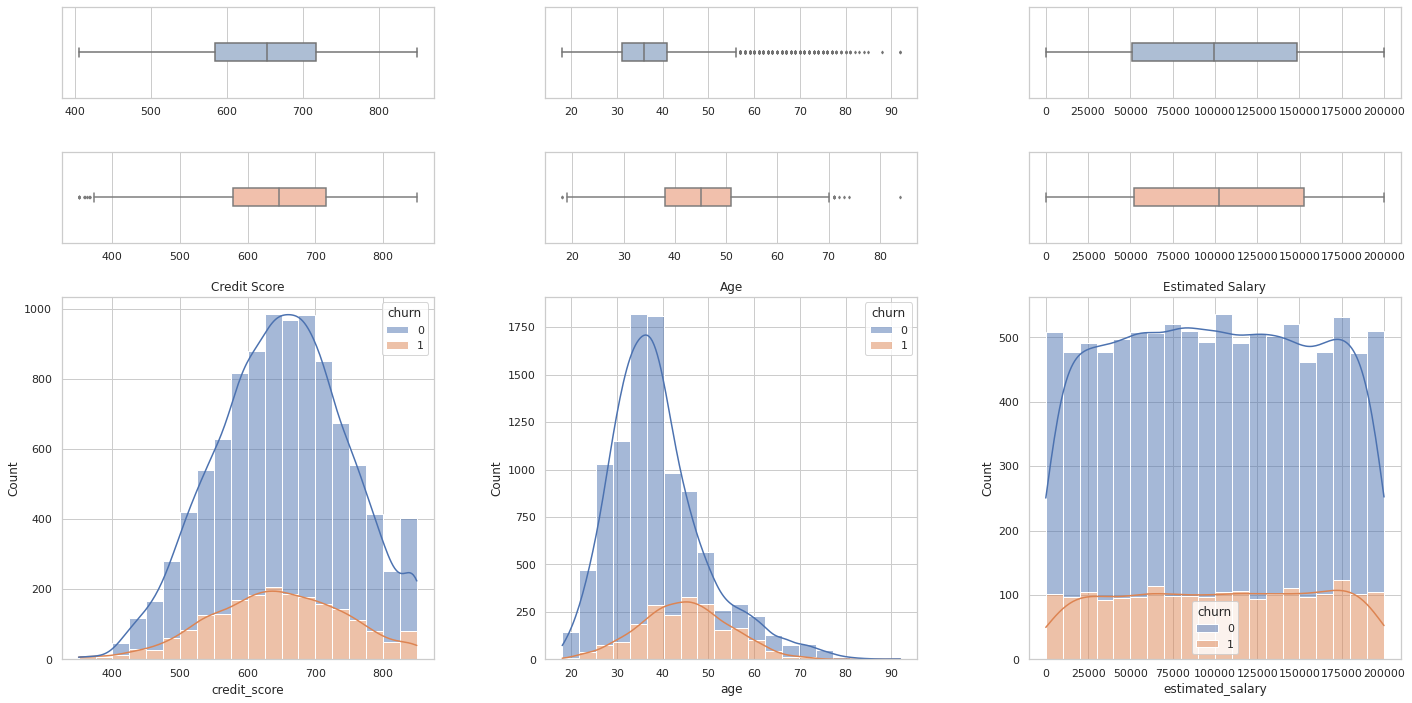

In [ ]:
#@title #Histogramas + boxplot + 'churn'
import matplotlib.pyplot as plt
import seaborn as sns

# Crea una figura y un conjunto de ejes de subtramas
fig, axes = plt.subplots(3, 3, figsize=(24, 12), gridspec_kw={'height_ratios': [1, 1, 4]})

# Lista de columnas y títulos
columns = [('Credit Score', 'credit_score'), ('Age', 'age'), ('Estimated Salary', 'estimated_salary')]

# Función para trazar el histograma en un eje específico
def plot_histogram2(ax, column, title, bins=20):
    sns.histplot(data=df, x=column, bins=bins, kde=True, ax=ax, hue='churn', multiple='stack')
    ax.set_title(title)

# Función para trazar el boxplot en un eje específico
def plot_boxplot2(ax, column, hue):
    churn_filtered = df[df['churn'] == hue]
    
    color = '#a6bddb' if hue == 0 else '#fcbba1'
    sns.boxplot(data=churn_filtered, x=column, ax=ax, width=0.2, fliersize=2, showfliers=True, palette=[color])

    ax.set_xlabel('')

# Ajusta el espacio entre los gráficos
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Itera sobre las columnas y crea un boxplot y un histograma para cada una
for idx, (title, column) in enumerate(columns):
    plot_boxplot2(axes[0, idx], column, hue=0)
    plot_boxplot2(axes[1, idx], column, hue=1)
    plot_histogram2(axes[2, idx], column, title)

# Muestra el gráfico
plt.show()


Podemos ver que aproximadamente las 3 cuartas partes de los qeu se fueron tienen mas de 40 y aproximadamente las 3 cuartas partes de los que no se fueron tienen menos de 40.

In [ ]:
#@title # Histogramas iteractivos vs 'churn'
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as ipw
from ipywidgets import interact

def plot_histogram(column, size, bins):
    # Establece el tamaño de la figura
    plt.figure(figsize=(4 * size, 3 * size))
    
    # Crea el histograma para la columna seleccionada diferenciando las clases churn=0 y churn=1
    sns.histplot(data=df, x=column, bins=bins, kde=False, hue='churn', multiple='stack')
    
    # Establece el título del gráfico
    plt.title(column.capitalize())
    
    # Muestra el gráfico
    plt.show()

# Crea un menú desplegable para seleccionar la columna
column_dropdown = ipw.Dropdown(
    options=[
        ('Credit Score', 'credit_score'),
        ('Age', 'age'),
        ('Estimated Salary', 'estimated_salary')
    ],
    value='credit_score',
    description='Column:'
)

# Crea un control deslizante para ajustar el tamaño del gráfico
size_slider = ipw.IntSlider(min=1, max=4, value=1, description='Size')

# Crea un control deslizante para ajustar la cantidad de bins
bins_slider = ipw.IntSlider(min=5, max=75, step=1, value=20, description="Bins")

# Utiliza la función interact para actualizar el gráfico según las selecciones del usuario
interact(plot_histogram, column=column_dropdown, size=size_slider, bins=bins_slider);


interactive(children=(Dropdown(description='Column:', options=(('Credit Score', 'credit_score'), ('Age', 'age'…

Varibles discretas 👉 Gráficos de barras Versus 'churn'

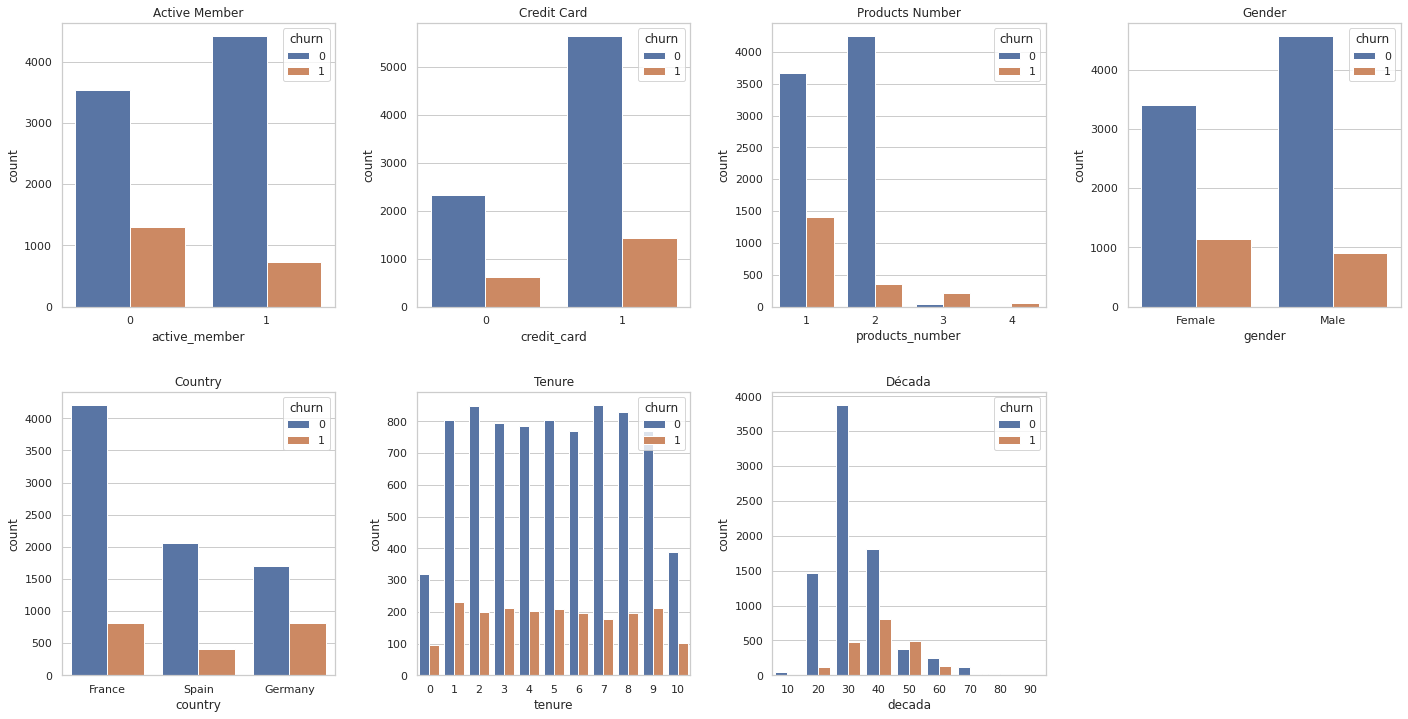

In [ ]:
#@title # Gráficos de barras vs 'churn'
import matplotlib.pyplot as plt
import seaborn as sns

# Crea una figura y un conjunto de ejes de subtramas
fig, axes = plt.subplots(2, 4, figsize=(24, 12))

# Lista de columnas y títulos
columns = [
    ('Active Member', 'active_member'),
    ('Credit Card', 'credit_card'),
    ('Products Number', 'products_number'),
    ('Gender', 'gender'),
    ('Country', 'country'),
    ('Tenure', 'tenure'),
    ('Década', 'decada')
]

# Función para trazar el gráfico de barras en un eje específico
def plot_bar(ax, column, title):
    sns.countplot(data=df, x=column, hue='churn', ax=ax)
    ax.set_title(title)

# Itera sobre las columnas y crea un gráfico de barras para cada una
for idx, (title, column) in enumerate(columns):
    plot_bar(axes[idx // 4, idx % 4], column, title)

# Elimina el eje vacío
axes[1, 3].axis('off')

# Ajusta el espacio entre los gráficos
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Muestra el gráfico
plt.show()

In [ ]:
#@title Gráficos de barras Versus 'churn' interactivo
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as ipw
from ipywidgets import interact

def plot_bar(column, size):
    # Establece el tamaño de la figura
    plt.figure(figsize=(4 * size, 3 * size))
    
    # Crea el gráfico de barras para la columna seleccionada diferenciando por 'churn'
    sns.countplot(data=df, x=column, hue='churn')
    
    # Establece el título del gráfico
    plt.title(column.capitalize())
    
    # Muestra el gráfico
    plt.show()

# Crea un menú desplegable para seleccionar la columna
column_dropdown = ipw.Dropdown(
    options=[
        ('Active Member', 'active_member'),
        ('Credit Card', 'credit_card'),
        ('Products Number', 'products_number'),
        ('Gender', 'gender'),
        ('Country', 'country'),
        ('Tenure', 'tenure'),
        ('Década', 'decada')
    ],
    value='active_member',
    description='Column:'
)

# Crea un control deslizante para ajustar el tamaño del gráfico
size_slider = ipw.IntSlider(min=1, max=4, value=1, description='Size')

# Utiliza la función interact para actualizar el gráfico según las selecciones del usuario
interact(plot_bar, column=column_dropdown, size=size_slider);



interactive(children=(Dropdown(description='Column:', options=(('Active Member', 'active_member'), ('Credit Ca…

* la "moda" de los que se quedan esta en los 30
* la "moda" de los que se van esta en los 40

In [ ]:
#@title plotly.express   x="age", y="balance"
import plotly.express as px
fig = px.histogram(df, x="age", y="balance", color="churn",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [ ]:
#@title plotly.express  x="age", y="credit_score"
import plotly.express as px
fig = px.histogram(df, x="age", y="credit_score", color="churn",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [ ]:
#@title plotly.express  x="age", y="estimated_salary"
import plotly.express as px
fig = px.histogram(df, x="age", y="estimated_salary", color="churn",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

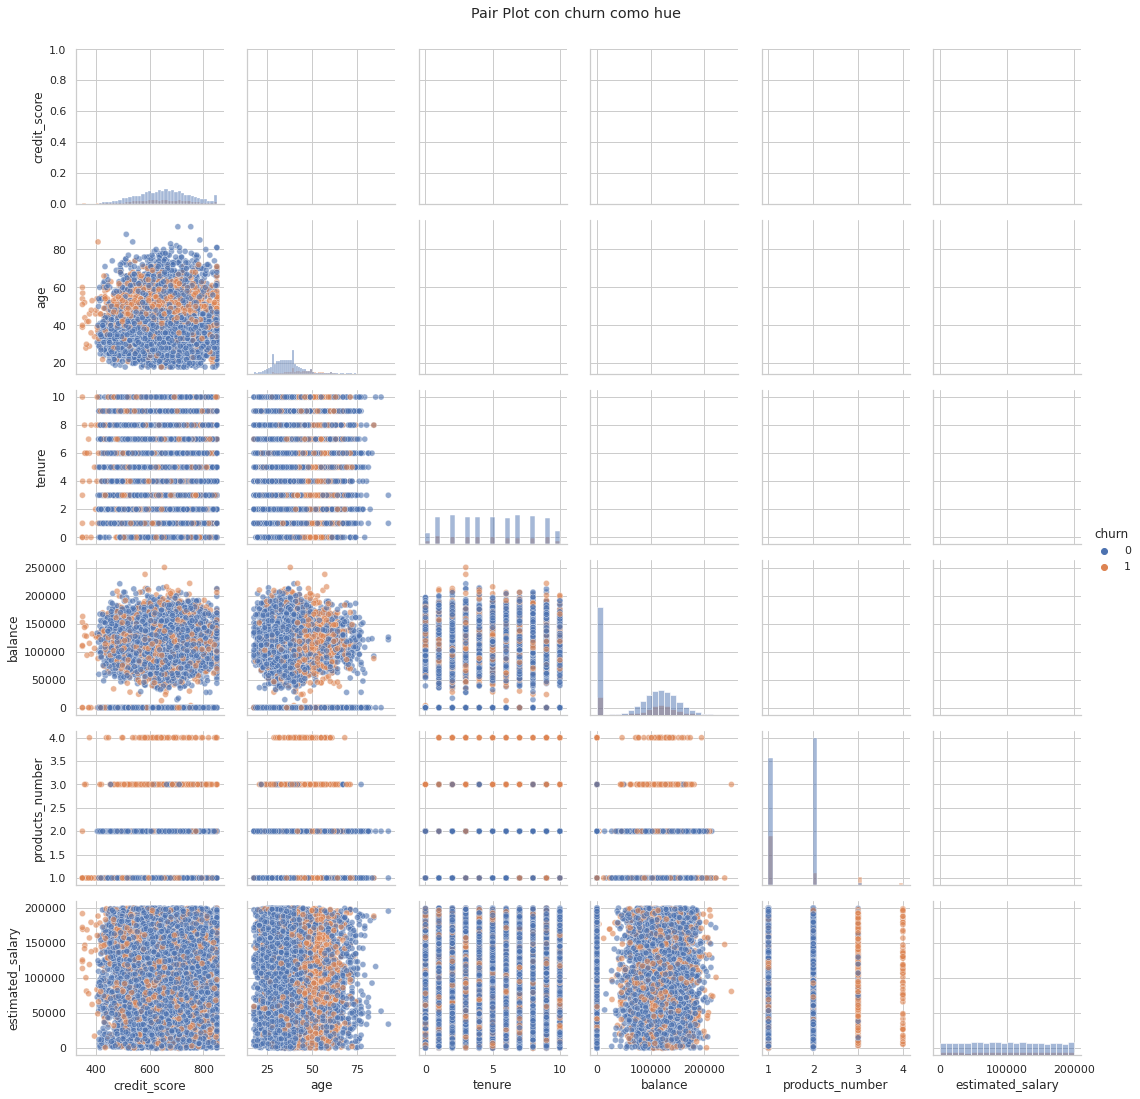

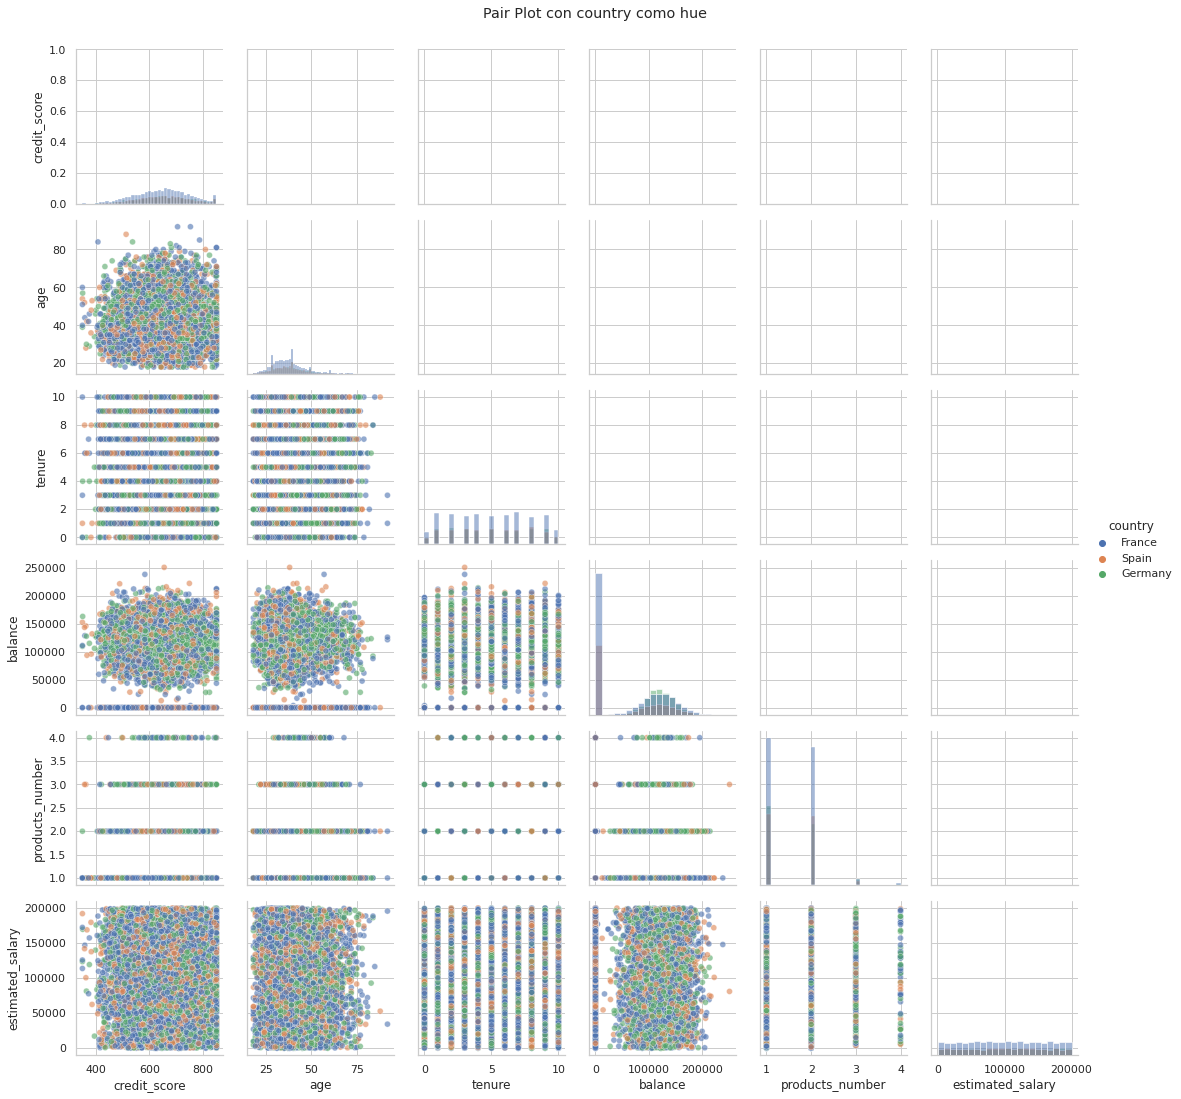

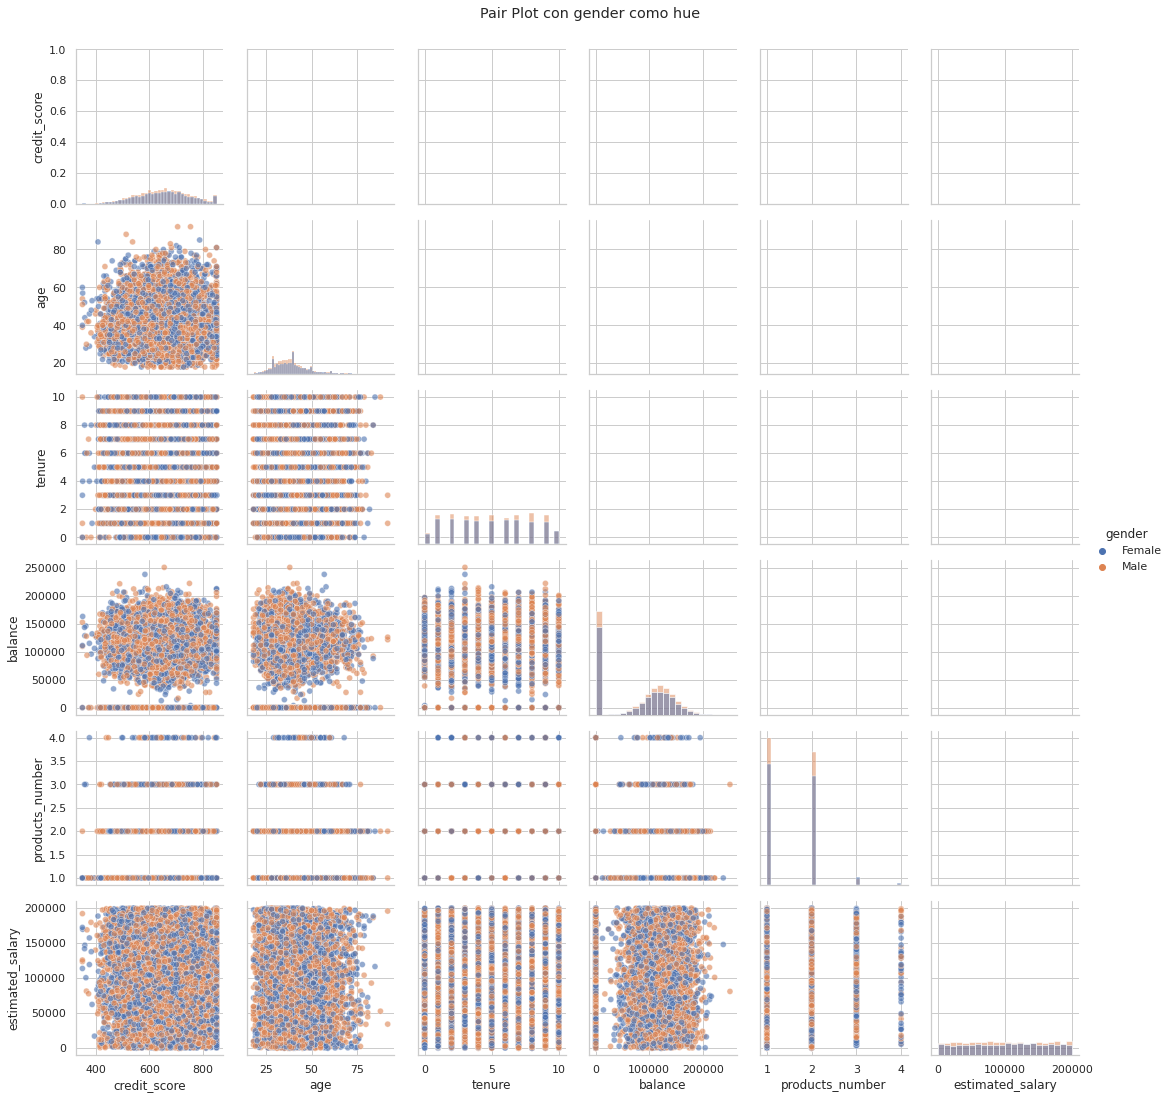

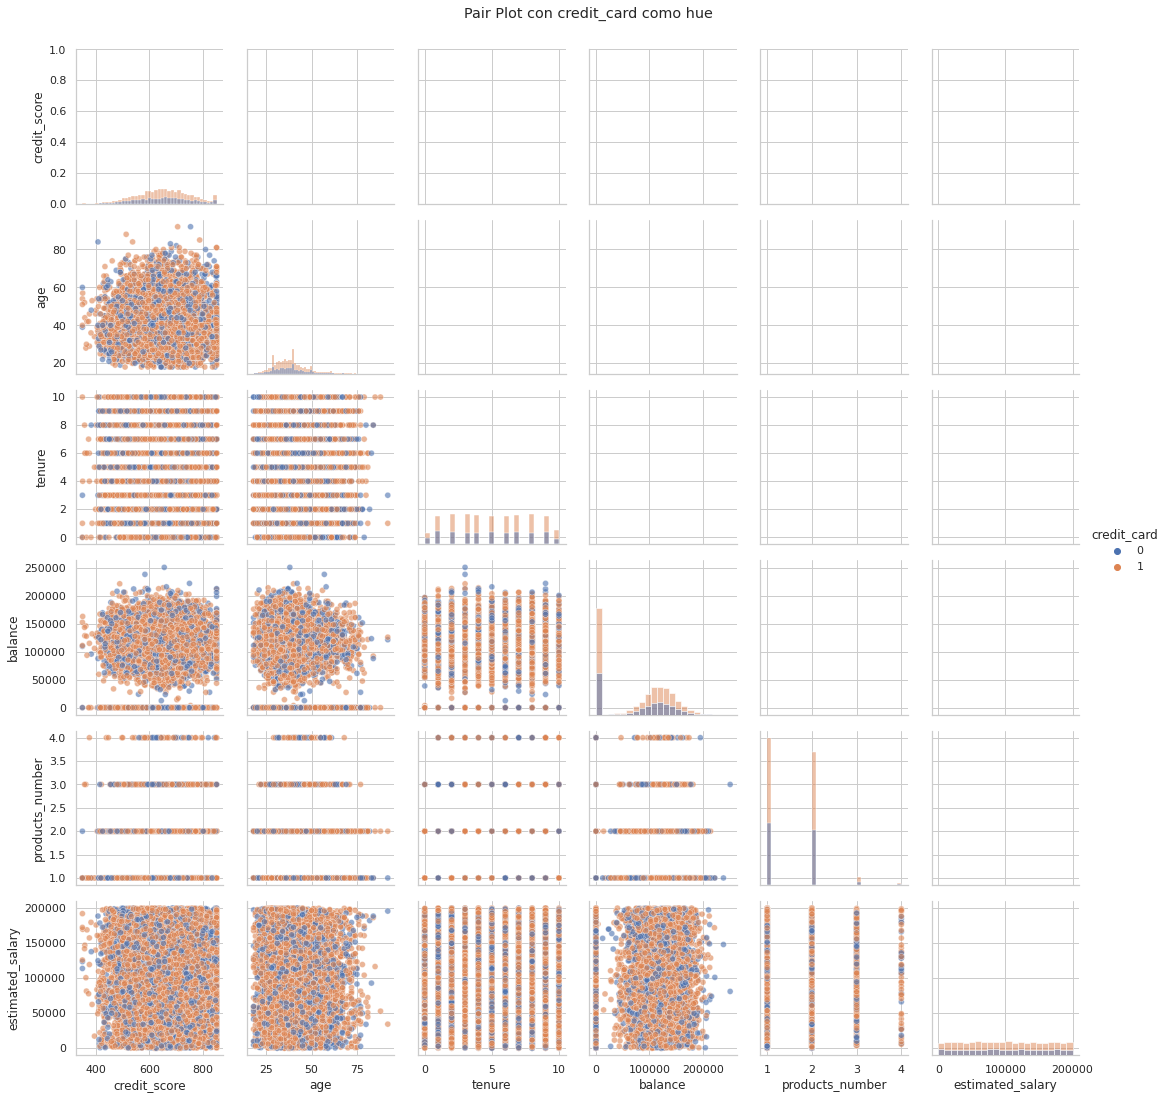

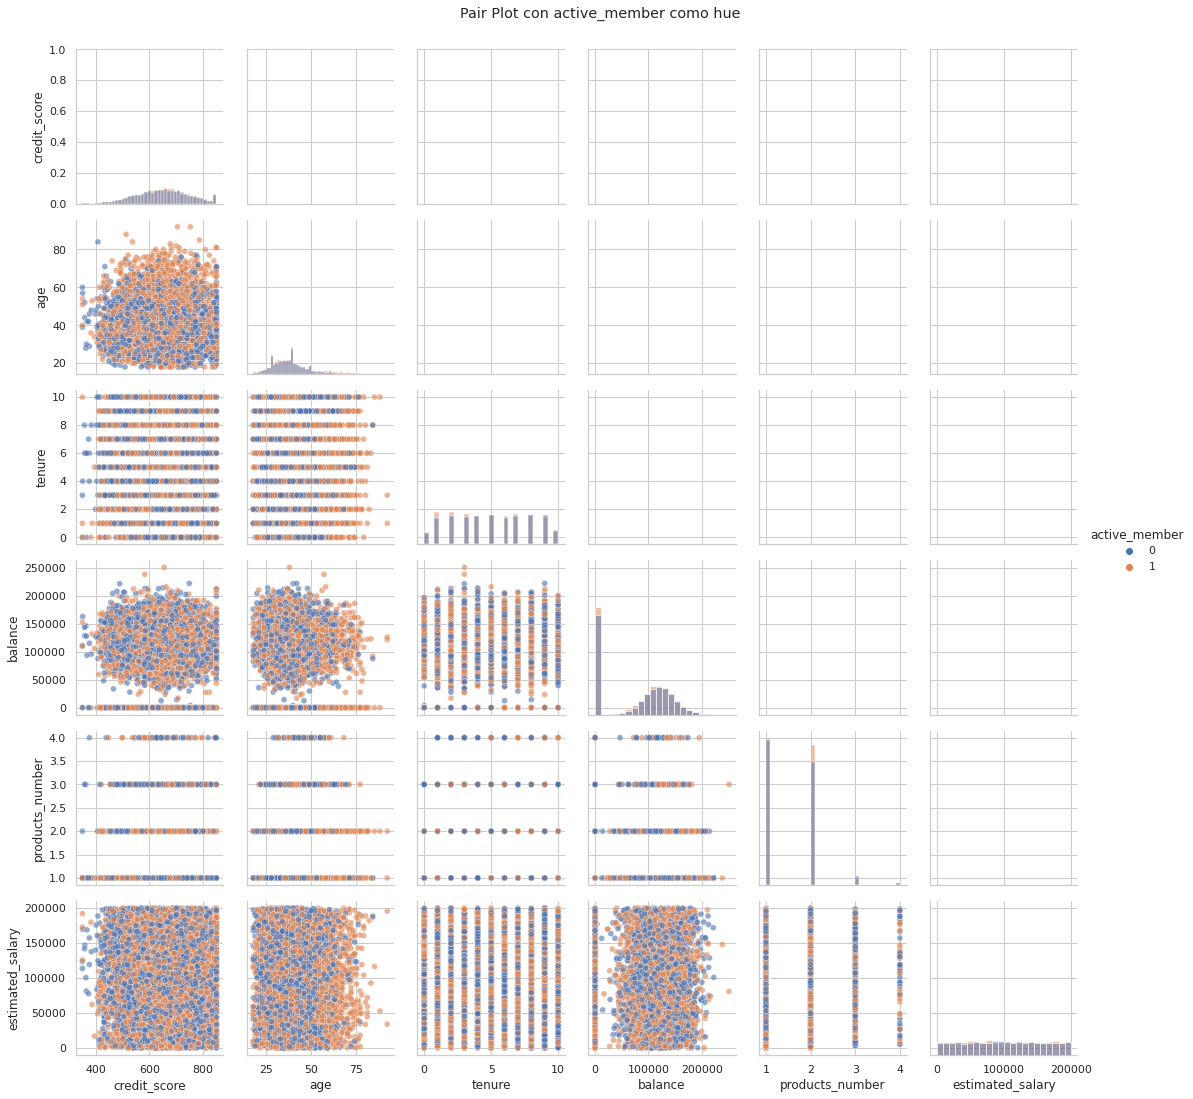

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Hacer una copia para no modificar el original
df_copy = df.copy()

# 2. Hacer drop de customer_id
df_copy.drop(columns=['customer_id'], inplace=True)

# 3. Tomar parejas de variables
pair_vars = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# 4. Usar hue
hue_vars = ['churn', 'country', 'gender', 'credit_card', 'active_member']

# Función personalizada para mostrar solo la parte inferior de la matriz
def hide_upper_triangle(*args, **kwargs):
    mask = np.zeros_like(args[0], dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    mask = ~mask
    sns.heatmap(args[0], mask=mask, **kwargs)

# Crear un pairplot para cada variable en hue_vars
for hue in hue_vars:
    g = sns.PairGrid(df_copy, vars=pair_vars, hue=hue)
    g.map_lower(sns.scatterplot, alpha=0.6)
    g.map_diag(sns.histplot)
    g.add_legend(title=hue)
    plt.suptitle(f"Pair Plot con {hue} como hue", y=1.02)
    plt.show()


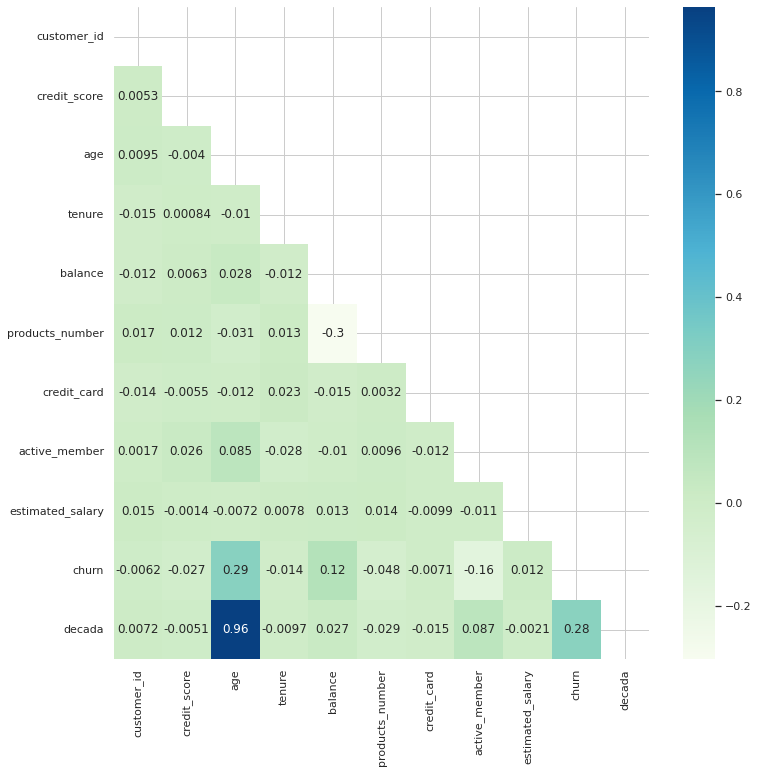

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear una máscara para ocultar la parte superior de la matriz
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Crear el heatmap con la máscara
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap="GnBu", mask=mask)
plt.show()


In [ ]:
#@title Country vs Churned %
churned_french = df.churn[(df.country == 'France') & (df.churn == 1)].count()
count_french = df.churn[df.country == 'France'].count()
print("Porcentaje de personas francesas que abandonaron --->", round(churned_french*100/count_french,ndigits=2),'%')

churned_german = df.churn[(df.country == 'Germany') & (df.churn == 1)].count()
count_german = df.churn[(df.country == 'Germany')].count()
print("Porcentaje de personas alemanas que abandonaron --->", round(churned_german*100/count_german,ndigits=2),"%")

churned_spain = df.churn[(df.country == 'Spain') & (df.churn == 1)].count()
count_spain = df.churn[(df.country == 'Spain')].count()
print("Porcentaje de personas españolas que abandonaron --->", round(churned_spain*100/count_spain,ndigits=2),"%")

Porcentaje de personas francesas que abandonaron ---> 16.15 %
Porcentaje de personas alemanas que abandonaron ---> 32.44 %
Porcentaje de personas españolas que abandonaron ---> 16.67 %


La edad tiene la correlación positiva más alta con los clientes que abandonaron. Por lo tanto, podemos decir que los clientes mayores tienen más probabilidades de abandonar que los más jóvenes.

La mayoría de los datos provienen de personas de Francia. Sin embargo, la proporción de clientes que abandonaron está inversamente relacionada con la población de clientes, lo que alude a que el banco posiblemente tenga un problema (tal vez no haya suficientes recursos de atención al cliente asignados) en las áreas donde tiene menos clientes.

La proporción de clientes mujeres que abandonaron también es mayor que la de los clientes hombres.

Curiosamente, la mayoría de los clientes que abandonaron son aquellos con tarjetas de crédito. Dado que la mayoría de los clientes tienen tarjetas de crédito, esto podría ser solo una coincidencia.

Como era de esperar, los miembros inactivos tienen una mayor tasa de abandono. Lo preocupante es que la proporción general de miembros inactivos es bastante alta, lo que sugiere que el banco puede necesitar implementar un programa para convertir a este grupo en clientes activos, ya que esto definitivamente tendrá un impacto positivo en la tasa de abandono de clientes.